# 统计图像尺寸、比例分布

## 导入工具包

In [1]:
import os
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!unzip dataset_full.zip >> /dev/null

## 指定数据集路径

In [3]:
# 指定数据集路径
dataset_path = 'dataset'
os.chdir(dataset_path)
os.listdir()

['狗', '猫', '乌龟', '金鱼', '仓鼠', '兔子', '鹦鹉']

In [4]:
df = pd.DataFrame()
for fruit in tqdm(os.listdir()): # 遍历每个类别    
    os.chdir(fruit)
    for file in os.listdir(): # 遍历每张图像
        try:
            img = cv2.imread(file)
            df = df.append({'类别':fruit, '文件名':file, '图像宽':img.shape[1], '图像高':img.shape[0]}, ignore_index=True)
        except:
            print(os.path.join(fruit, file), '读取错误')
    os.chdir('../')
os.chdir('../')

 43%|████▎     | 3/7 [00:13<00:17,  4.35s/it]

金鱼/301.jpg 读取错误


100%|██████████| 7/7 [00:28<00:00,  4.10s/it]


In [5]:
df

,类别,文件名,图像宽,图像高
0,狗,225.jpg,776.0,500.0
1,狗,29.jpg,500.0,891.0
2,狗,259.jpg,450.0,300.0
3,狗,288.jpg,500.0,666.0
4,狗,477.jpg,751.0,500.0
...,...,...,...,...
2887,鹦鹉,396.jpg,500.0,734.0
2888,鹦鹉,70.jpg,692.0,500.0
2889,鹦鹉,347.jpg,499.0,333.0
2890,鹦鹉,87.png,753.0,500.0


## 可视化图像尺寸分布

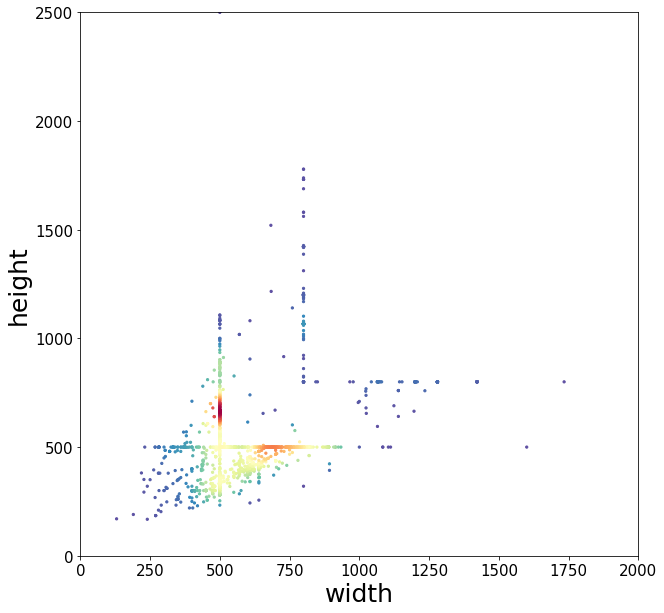

In [6]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

x = df['图像宽']
y = df['图像高']

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

plt.figure(figsize=(10,10))
# plt.figure(figsize=(12,12))
plt.scatter(x, y, c=z,  s=5, cmap='Spectral_r')
# plt.colorbar()
# plt.xticks([])
# plt.yticks([])

plt.tick_params(labelsize=15)

xy_max = max(max(df['图像宽']), max(df['图像高']))
plt.xlim(xmin=0, xmax=2000)
plt.ylim(ymin=0, ymax=2500)

plt.ylabel('height', fontsize=25)
plt.xlabel('width', fontsize=25)

plt.savefig('图像尺寸分布.pdf', dpi=120, bbox_inches='tight')

plt.show()